# SUMMER ANALYTICS 2024



# Week-1 Assignment

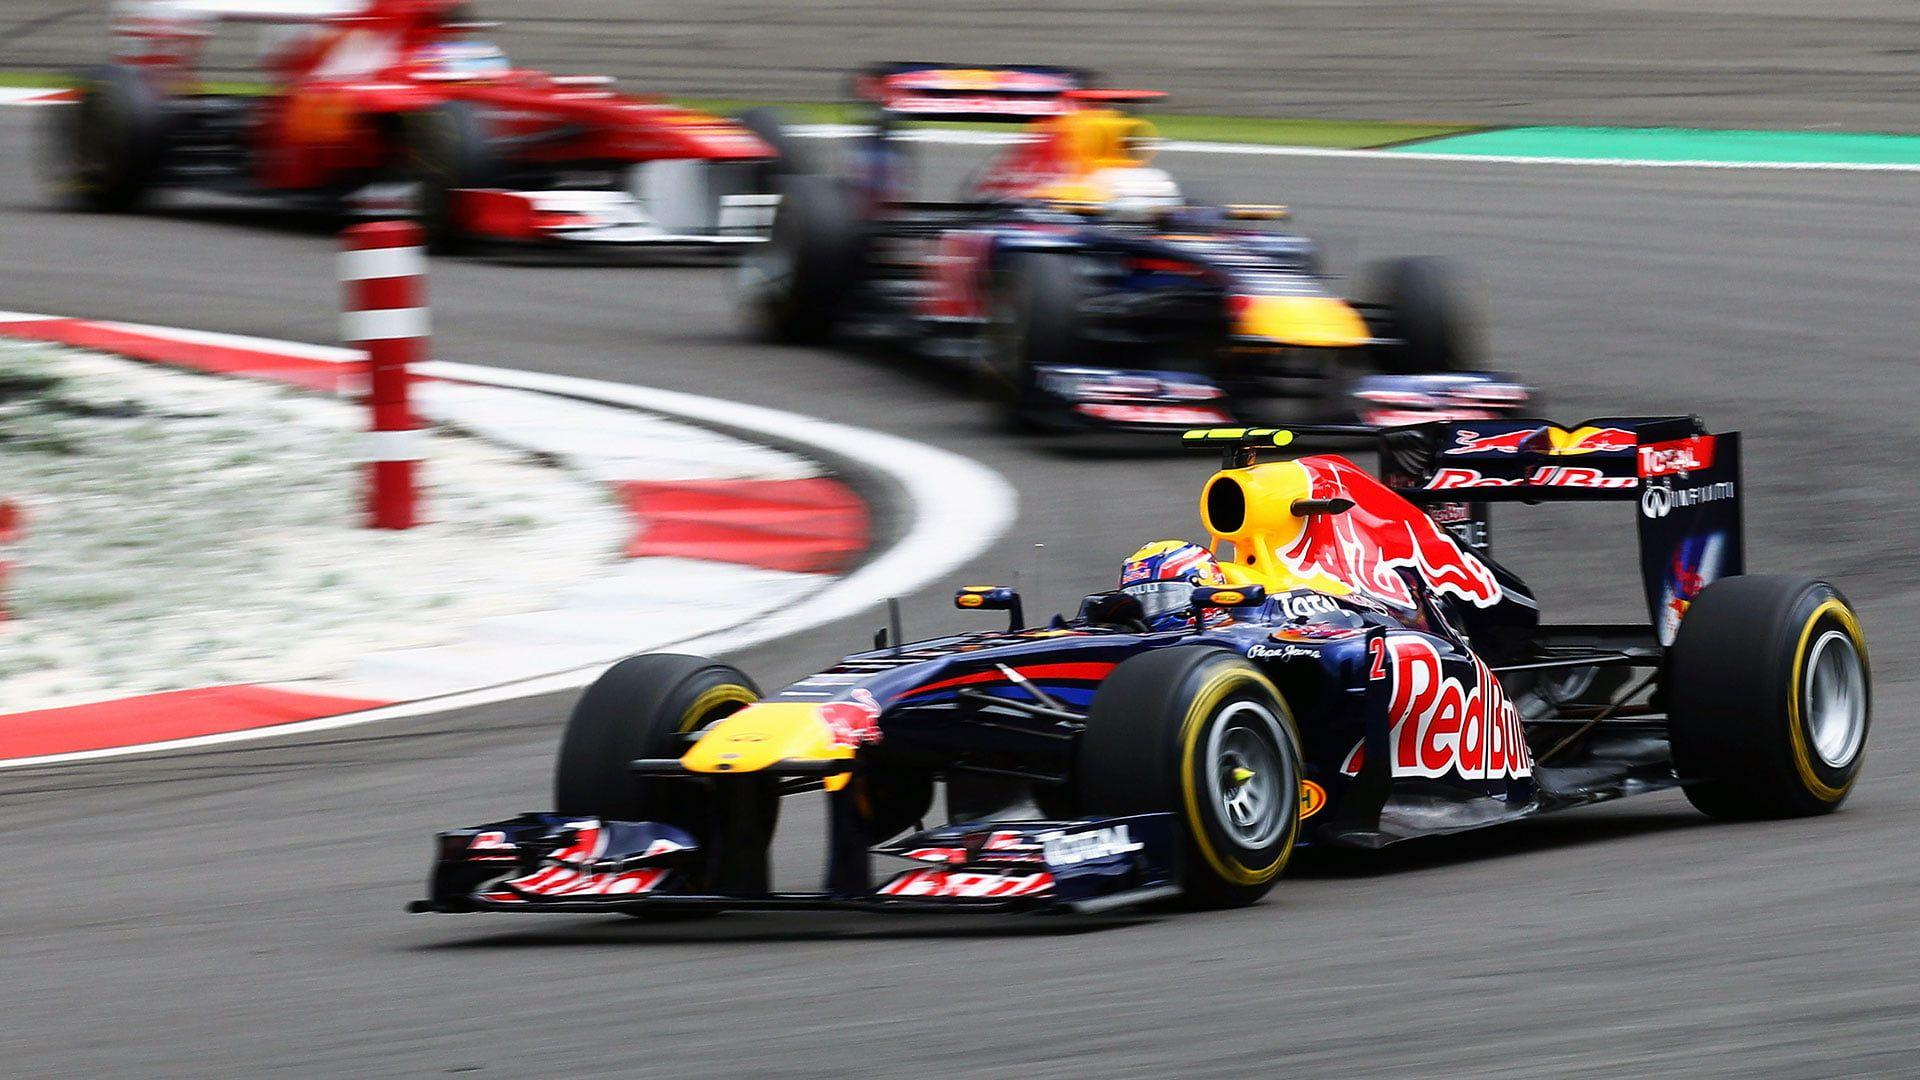

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2) Read the csv file and assign it to a variable .

In [7]:
df = pd.read_csv("Cars.csv")


### 3) Display shape of dataframe
Expected Output - (398, 9)

In [8]:
print(df.shape)

(398, 9)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [9]:
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


### 6) Set the 'name' column as the index of dataframe

In [10]:
df.rename(columns={'name': 'car_name'}, inplace=True)
df['car_name'] = df['car_name'].str.strip().str.lower()



###  7) Print a list of all the unique mpg values





In [11]:
# Task 7
unique_mpg_values = sorted(df['mpg'].unique())
print("Unique mpg values:", unique_mpg_values)


Unique mpg values: [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 15.5, 16.0, 16.2, 16.5, 16.9, 17.0, 17.5, 17.6, 17.7, 18.0, 18.1, 18.2, 18.5, 18.6, 19.0, 19.1, 19.2, 19.4, 19.8, 19.9, 20.0, 20.2, 20.3, 20.5, 20.6, 20.8, 21.0, 21.1, 21.5, 21.6, 22.0, 22.3, 22.4, 22.5, 23.0, 23.2, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.2, 24.3, 24.5, 25.0, 25.1, 25.4, 25.5, 25.8, 26.0, 26.4, 26.5, 26.6, 26.8, 27.0, 27.2, 27.4, 27.5, 27.9, 28.0, 28.1, 28.4, 28.8, 29.0, 29.5, 29.8, 29.9, 30.0, 30.5, 30.7, 30.9, 31.0, 31.3, 31.5, 31.6, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.7, 32.8, 32.9, 33.0, 33.5, 33.7, 33.8, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 35.0, 35.1, 35.7, 36.0, 36.1, 36.4, 37.0, 37.2, 37.3, 37.7, 38.0, 38.1, 39.0, 39.1, 39.4, 40.8, 40.9, 41.5, 43.1, 43.4, 44.0, 44.3, 44.6, 46.6]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [12]:
# Step 1: Clean 'horsepower' column (replace '?' with NaN and convert to float)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Step 2: Drop rows where horsepower or weight is missing
df = df.dropna(subset=['horsepower', 'weight'])

# Step 3: Recalculate multi-year and consistent cars after cleaning
multi_year_cars = df.groupby('car_name')['model_year'].nunique()
multi_year_cars = multi_year_cars[multi_year_cars > 1].index

df_multi = df[df['car_name'].isin(multi_year_cars)]

std_mpg = df_multi.groupby('car_name')['mpg'].std()
consistent_car_names = std_mpg[std_mpg < 1.0].index

consistent_df = df_multi[df_multi['car_name'].isin(consistent_car_names)].copy()

# Step 4: Create metric column (horsepower / weight)
consistent_df['hp_per_weight'] = consistent_df['horsepower'] / consistent_df['weight']

# Step 5: Set this new column as the index
consistent_df.set_index('hp_per_weight', inplace=True)

# Step 6: Show the updated DataFrame
print(consistent_df.head())


                mpg  cylinders  displacement  horsepower  weight  \
hp_per_weight                                                      
0.037100       18.0          8         307.0       130.0    3504   
0.045612       15.0          8         429.0       198.0    4341   
0.049861       14.0          8         440.0       215.0    4312   
0.041315       27.0          4          97.0        88.0    2130   
0.041315       27.0          4          97.0        88.0    2130   

               acceleration  model_year origin                   car_name  
hp_per_weight                                                              
0.037100               12.0          70    usa  chevrolet chevelle malibu  
0.045612               10.0          70    usa           ford galaxie 500  
0.049861                8.5          70    usa          plymouth fury iii  
0.041315               14.5          70  japan               datsun pl510  
0.041315               14.5          71  japan               datsun

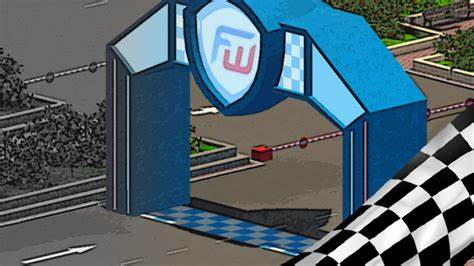

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [13]:
df.loc[:, 'horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
max_hp_row = df.loc[df['horsepower'].idxmax()]
print("Car with highest horsepower:", max_hp_row['car_name'])
print("Horsepower:", max_hp_row['horsepower'])

Car with highest horsepower: pontiac grand prix
Horsepower: 230.0


### 2. How many cars have mpg ≥ 35?

In [14]:

df.loc[:, 'mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# Filter rows where mpg >= 35
high_mpg_cars = df[df['mpg'] >= 35]

# Count how many such cars
count_high_mpg = high_mpg_cars.shape[0]

print("Number of cars with mpg ≥ 35:", count_high_mpg)


Number of cars with mpg ≥ 35: 35


### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [15]:
# Make sure horsepower and weight are numeric
df.loc[:, 'horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.loc[:, 'weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Filter cars with horsepower > 100 and weight < 3000
filtered_cars = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]

# Find the most common origin among these cars
most_common_origin = filtered_cars['origin'].mode()[0]

print("Most common origin for cars with horsepower > 100 and weight < 3000:", most_common_origin)


Most common origin for cars with horsepower > 100 and weight < 3000: usa


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [16]:
# Convert acceleration column safely
df.loc[:, 'acceleration'] = pd.to_numeric(df['acceleration'], errors='coerce')

# Filter cars from Japan
japan_cars = df[df['origin'] == 'japan']

# Calculate mean acceleration and round to 2 decimals
mean_acceleration_japan = round(japan_cars['acceleration'].mean(), 2)

print("Mean acceleration of cars from Japan:", mean_acceleration_japan)


Mean acceleration of cars from Japan: 16.17


### 5. Which year had the highest average mpg?

In [17]:
# Ensure mpg is numeric
df.loc[:, 'mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# Group by model_year and calculate mean mpg
avg_mpg_by_year = df.groupby('model_year')['mpg'].mean()

# Find the year with the highest average mpg
year_highest_avg_mpg = avg_mpg_by_year.idxmax()
highest_avg_mpg = avg_mpg_by_year.max()

print(f"Year with highest average mpg: {year_highest_avg_mpg}")
print(f"Highest average mpg: {round(highest_avg_mpg, 2)}")


Year with highest average mpg: 80
Highest average mpg: 33.8



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [18]:
# Ensure horsepower, weight, and mpg are numeric
df.loc[:, 'horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.loc[:, 'weight'] = pd.to_numeric(df['weight'], errors='coerce')
df.loc[:, 'mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# Calculate median mpg
median_mpg = df['mpg'].median()

# Filter cars with mpg above median
high_mpg_cars = df[df['mpg'] > median_mpg].copy()

# Calculate horsepower to weight ratio
high_mpg_cars['hp_to_weight'] = high_mpg_cars['horsepower'] / high_mpg_cars['weight']

# Find max ratio
max_ratio = high_mpg_cars['hp_to_weight'].max()

# Get car(s) with max ratio
best_cars = high_mpg_cars[high_mpg_cars['hp_to_weight'] == max_ratio]

# Display result
print("Car(s) with best horsepower-to-weight ratio and mpg above median:")
print(best_cars[['car_name', 'horsepower', 'weight', 'mpg', 'hp_to_weight']])


Car(s) with best horsepower-to-weight ratio and mpg above median:
    car_name  horsepower  weight   mpg  hp_to_weight
23  bmw 2002       113.0    2234  26.0      0.050582


### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

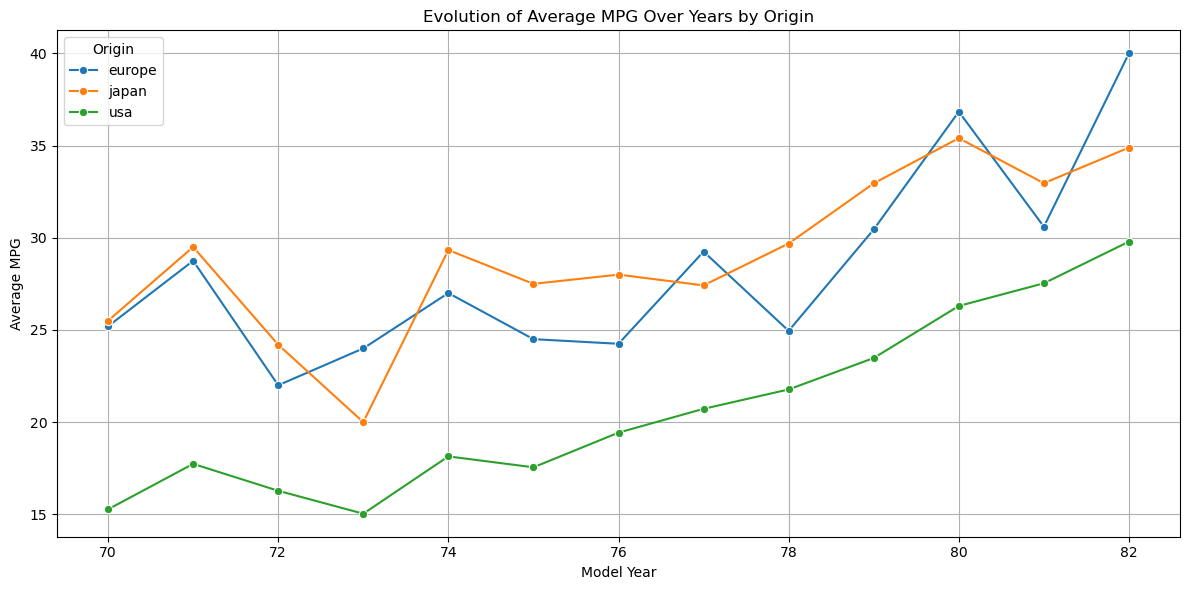

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure mpg and model_year are numeric
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

# Calculate average mpg per year and origin
avg_mpg = df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

# Set plot size
plt.figure(figsize=(12, 6))

# Plot with seaborn lineplot, one line per origin
sns.lineplot(data=avg_mpg, x='model_year', y='mpg', hue='origin', marker='o')

# Customize plot
plt.title('Evolution of Average MPG Over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

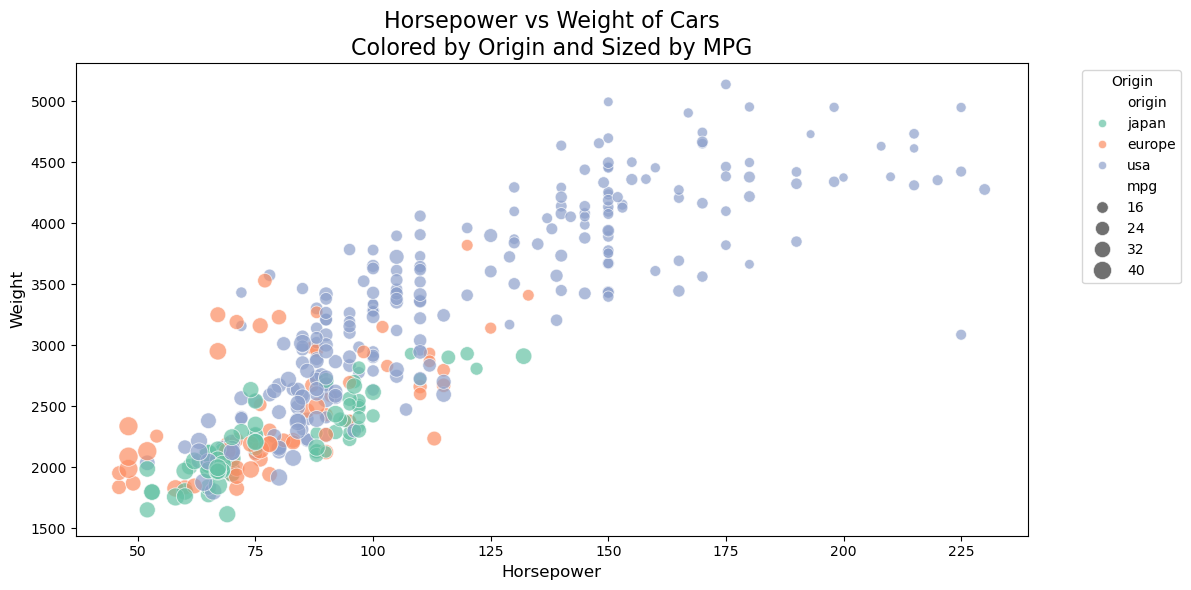

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric types
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['horsepower', 'weight', 'mpg', 'origin'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create scatterplot
sns.scatterplot(
    data=df_clean,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    sizes=(40, 200),
    alpha=0.7,
    palette='Set2',
    hue_order=['japan', 'europe', 'usa']
)

# Add titles and labels
plt.title('Horsepower vs Weight of Cars\nColored by Origin and Sized by MPG', fontsize=16)
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [21]:
import pandas as pd

# Ensure columns are numeric
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')

# Drop rows with missing data
df_clean = df.dropna(subset=['car_name', 'mpg', 'model_year'])

# Group by car_name
grouped = df_clean.groupby('car_name')

# Filter car names that appear in more than one model_year
consistent_cars = []

for name, group in grouped:
    years = group['model_year'].nunique()
    if years >= 2:
        mpg_std = group['mpg'].std()
        if mpg_std < 1.0:
            consistent_cars.append({
                'car_name': name,
                'num_years': years,
                'num_appearances': len(group),
                'avg_mpg': round(group['mpg'].mean(), 2),
                'std_mpg': round(mpg_std, 3)
            })

# Convert to DataFrame
consistent_df = pd.DataFrame(consistent_cars)

# Bonus: sort by number of appearances (descending), then mpg (descending)
consistent_df = consistent_df.sort_values(by=['num_appearances', 'avg_mpg'], ascending=[False, False])

# Display results
print("Consistent car models (std mpg < 1.0 across years):")
print(consistent_df[['car_name', 'num_appearances', 'avg_mpg', 'std_mpg']])


Consistent car models (std mpg < 1.0 across years):
                     car_name  num_appearances  avg_mpg  std_mpg
4            ford galaxie 500                3    14.33    0.577
8           plymouth fury iii                3    14.33    0.577
10        toyota corolla 1200                2    31.50    0.707
7                   mazda 626                2    31.45    0.212
12          volkswagen rabbit                2    29.25    0.354
2                datsun pl510                2    27.00    0.000
9                   saab 99le                2    24.50    0.707
11             toyota mark ii                2    19.50    0.707
3                 dodge aspen                2    18.85    0.354
1   chevrolet chevelle malibu                2    17.50    0.707
0            amc matador (sw)                2    14.50    0.707
5       ford gran torino (sw)                2    13.50    0.707
6                    ford ltd                2    13.50    0.707


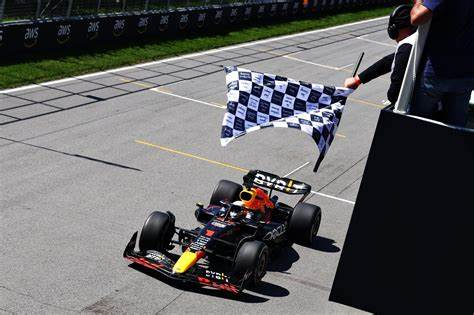

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**